In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file into a DataFrame
data = pd.read_excel('INE_IPC.xlsx')



In [67]:
data.rename(columns={
    'Unnamed: 0': 'time',
    '    Índice general': 'index_general',
    '    01 Alimentos y bebidas no alcohólicas': 'food_beverages',
    '    02 Bebidas alcohólicas y tabaco': 'alc_tobacco',
    '    03 Vestido y calzado': 'clothing_footwear',
    '    04 Vivienda, agua, electricidad, gas y otros combustibles': 'housing_utilities',
    '    05 Muebles, artículos del hogar y artículos para el mantenimiento corriente del hogar': 'furniture_household',
    '    06 Sanidad': 'health',
    '    07 Transporte': 'transport',
    '    08 Comunicaciones': 'communications',
    '    09 Ocio y cultura': 'leisure_culture',
    '    10 Enseñanza': 'education',
    '    11 Restaurantes y hoteles': 'restaurants_hotels',
    '    12 Otros bienes y servicios': 'other_goods_services'
}, inplace=True)

data['time'] = pd.to_datetime(data['time'], format='%YM%m')



In [68]:
def plot_inflation(data, inflation_type):
    title = inflation_type
    plt.figure(figsize=(14, 7))

    # Line plot of inflation over time
    plt.subplot(2, 1, 1)
    plt.plot(data['time'], data[inflation_type], marker='o', color='r')
    plt.xlabel('Time')
    plt.ylabel(inflation_type.replace('_', ' ').title())
    plt.title(f'{title} Over Time')
    plt.grid(True)

    # Histogram of inflation
    plt.subplot(2, 1, 2)
    plt.hist(data[inflation_type].dropna(), bins=30, edgecolor='k', color='r')
    plt.xlabel(inflation_type.replace('_', ' ').title())
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {title}')

    plt.tight_layout()
    plt.show()

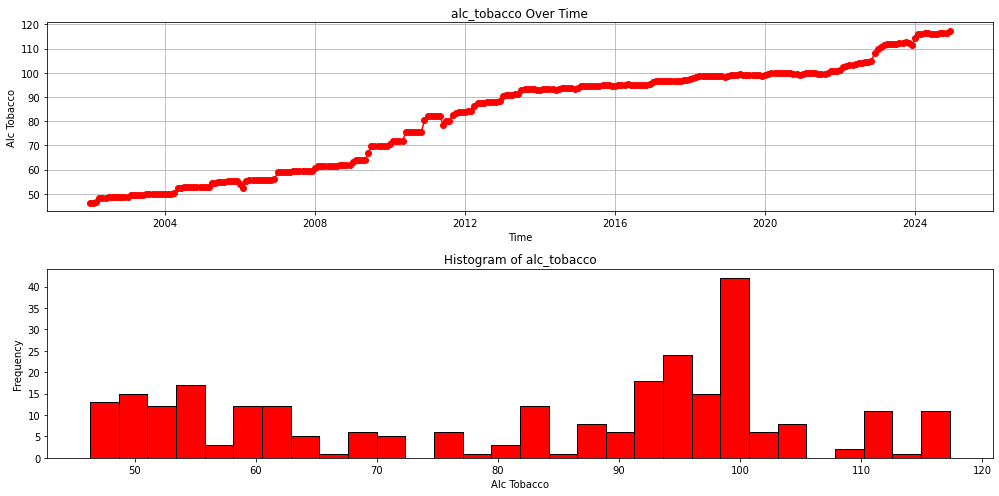

In [69]:
plot_inflation(data, 'alc_tobacco')


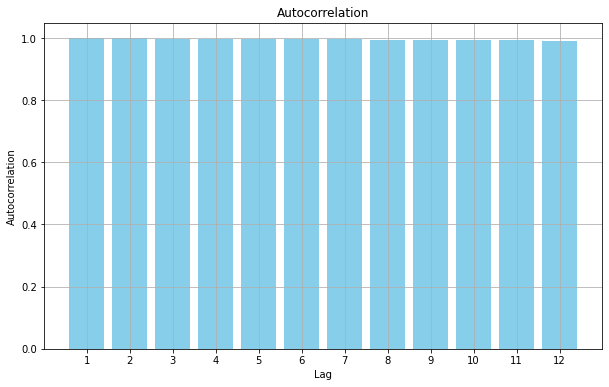

In [70]:

def plot_autocorrelations(autocorrelations):
    plt.figure(figsize=(10, 6))
    plt.bar(range(1, 13), autocorrelations, color='skyblue')
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.title('Autocorrelation')
    plt.xticks(range(1, 13))
    plt.grid(True)
    plt.show()

autocorrelations = [data['alc_tobacco'].autocorr(lag=i) for i in range(1, 13)]
plot_autocorrelations(autocorrelations)

############################################ index_general ############################################


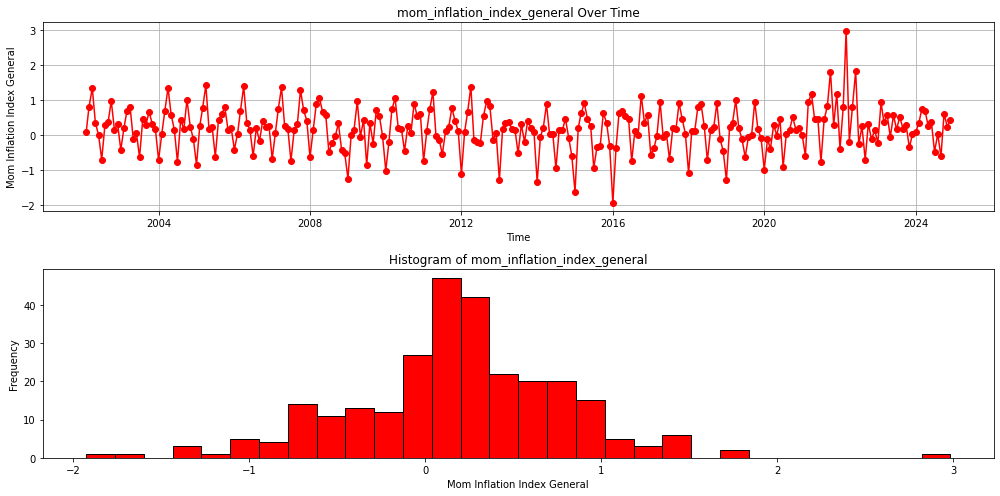

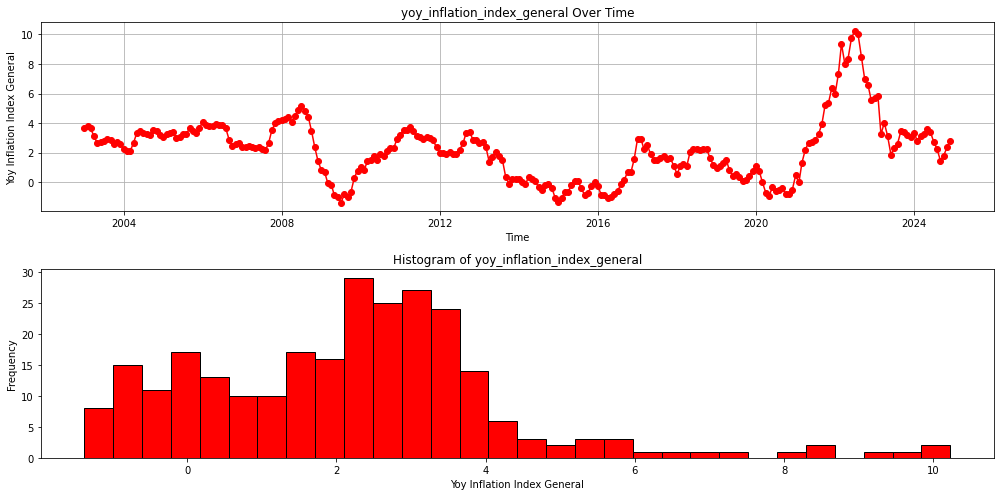

############################################ food_beverages ############################################


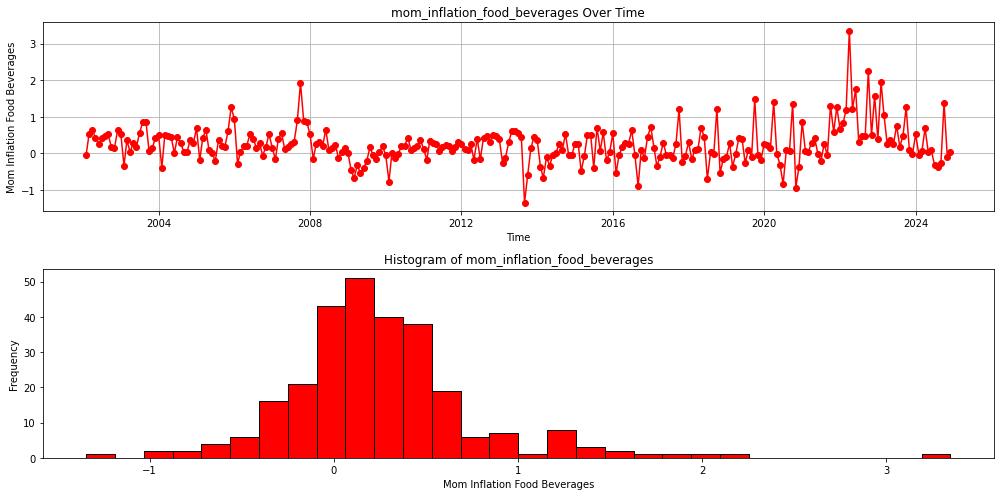

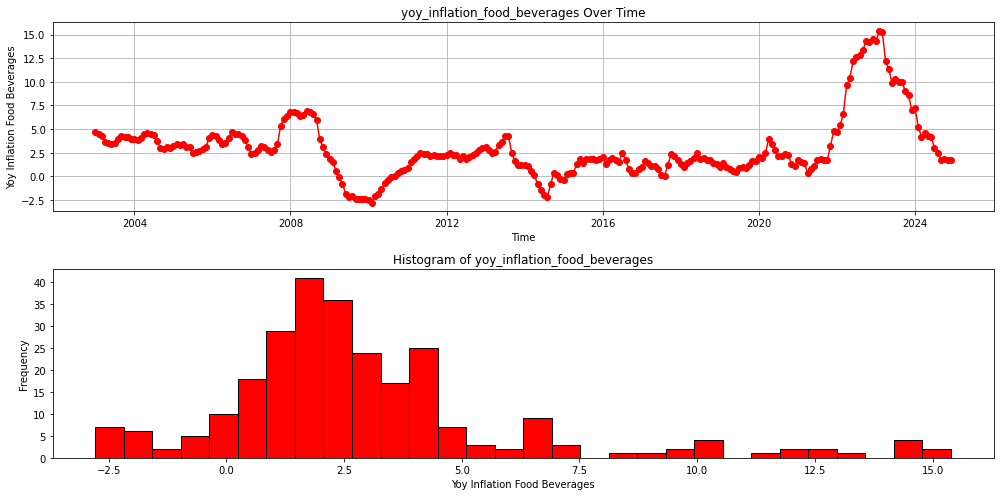

############################################ alc_tobacco ############################################


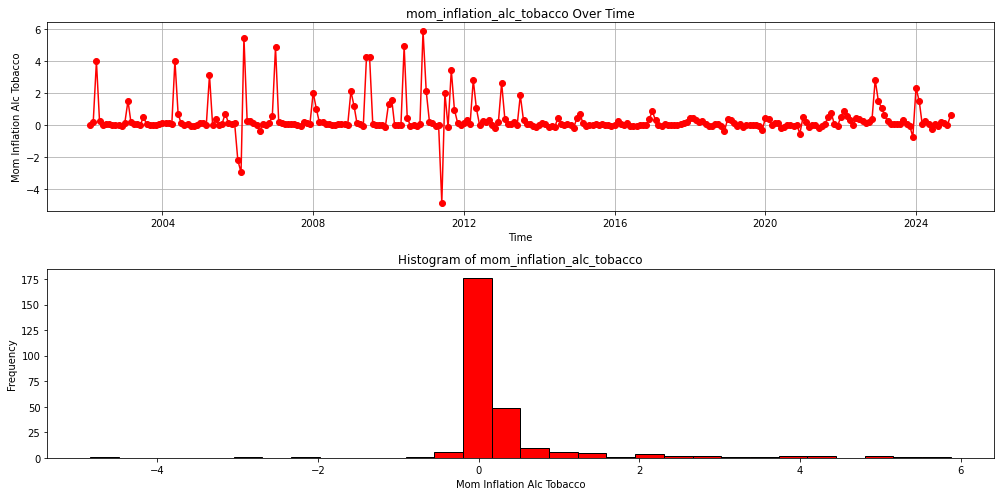

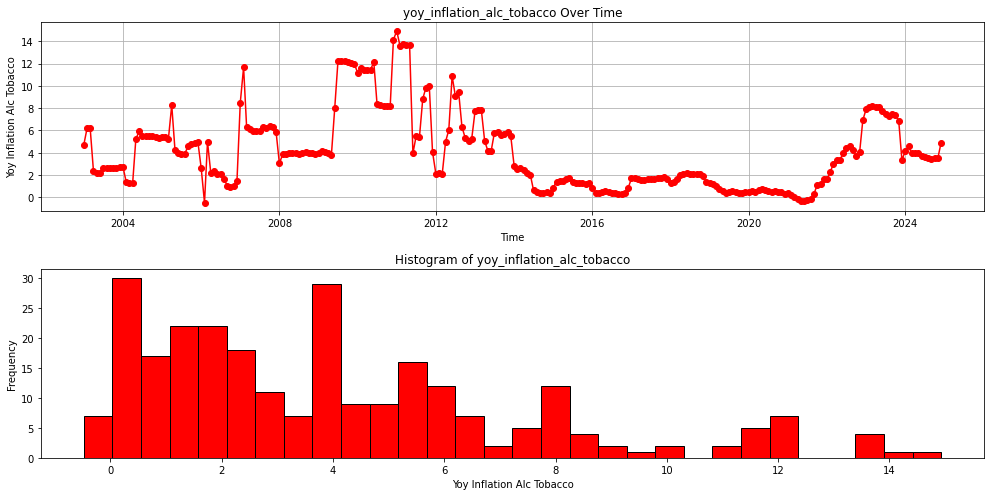

############################################ clothing_footwear ############################################


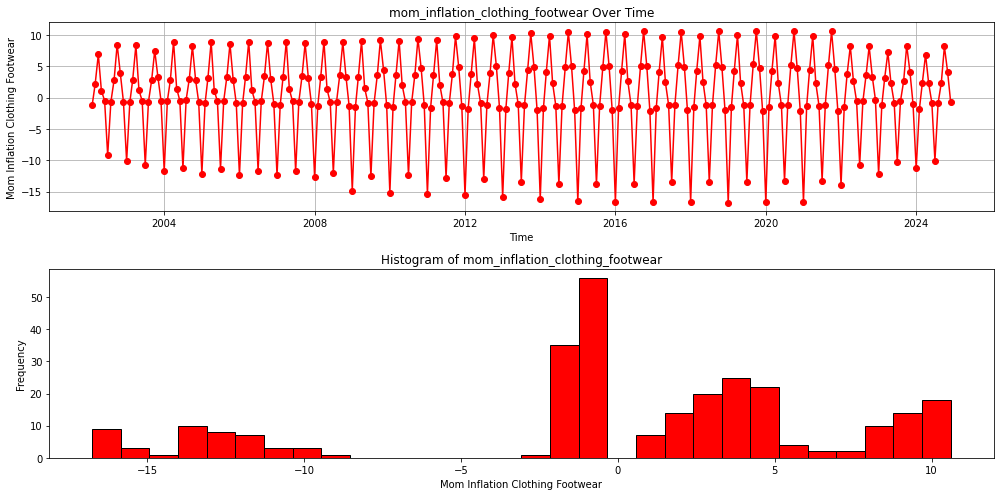

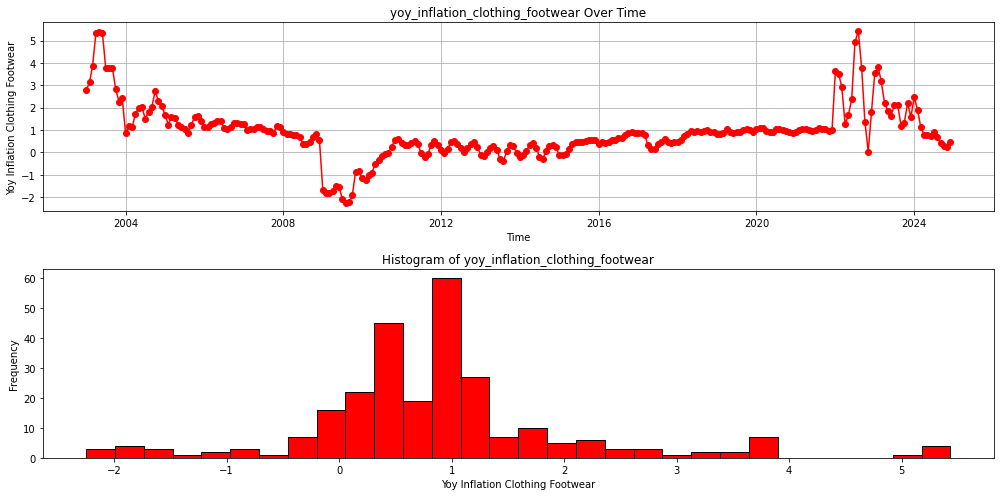

############################################ housing_utilities ############################################


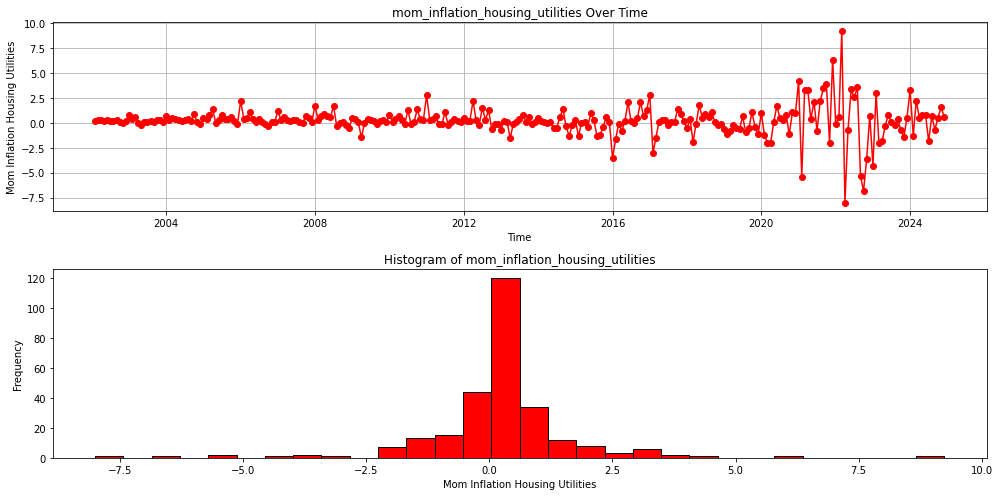

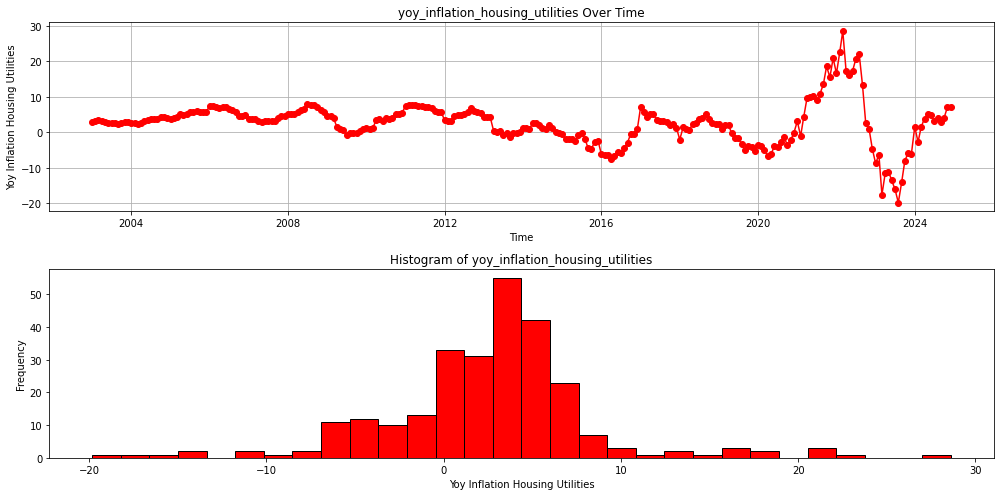

############################################ furniture_household ############################################


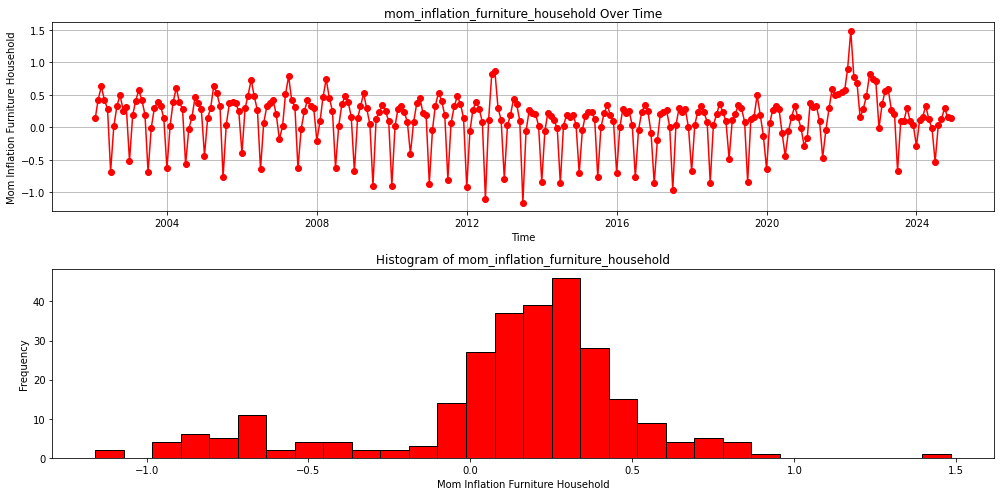

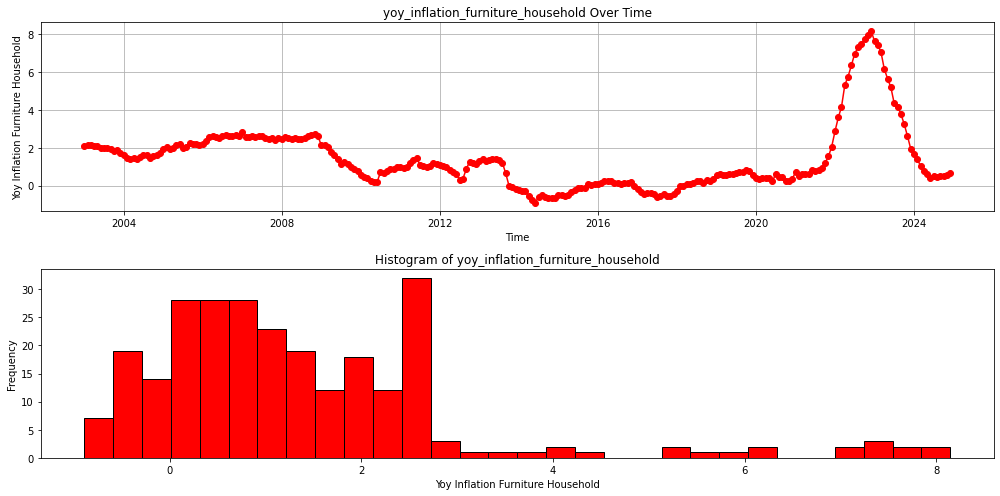

############################################ health ############################################


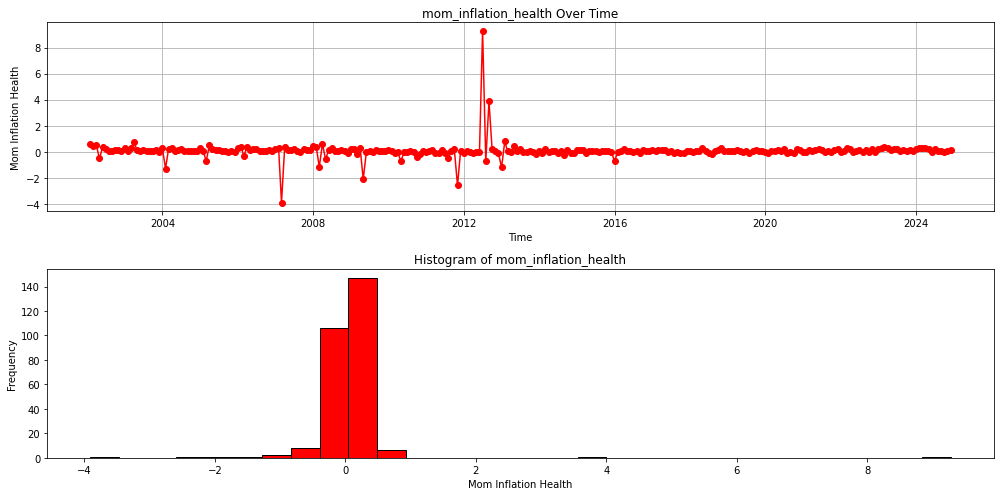

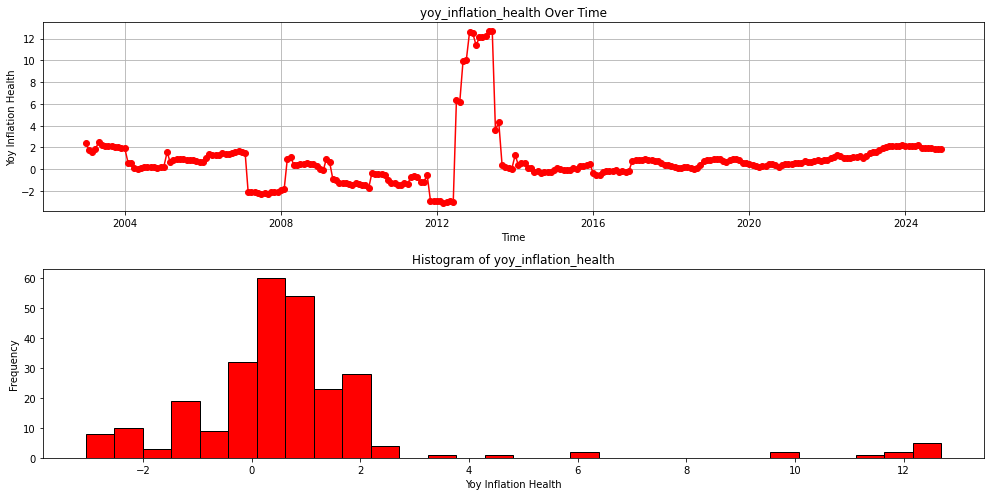

############################################ transport ############################################


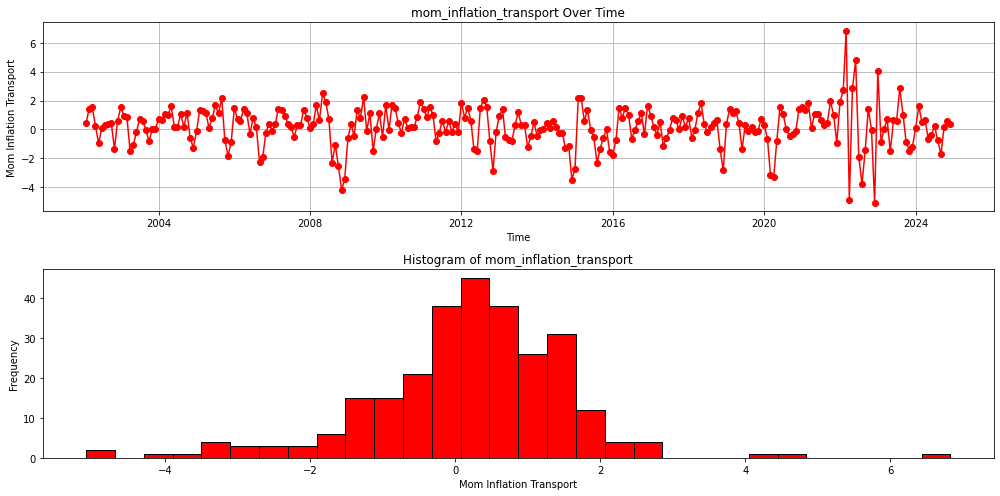

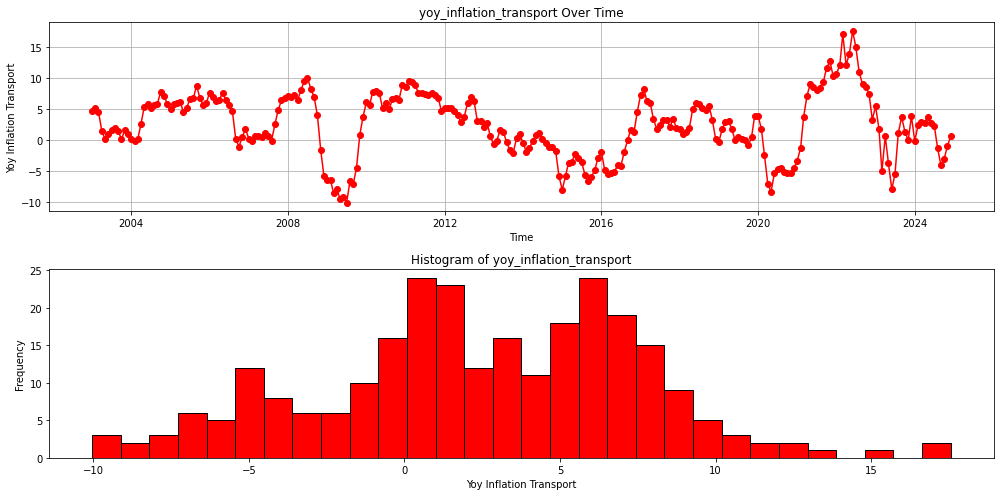

############################################ communications ############################################


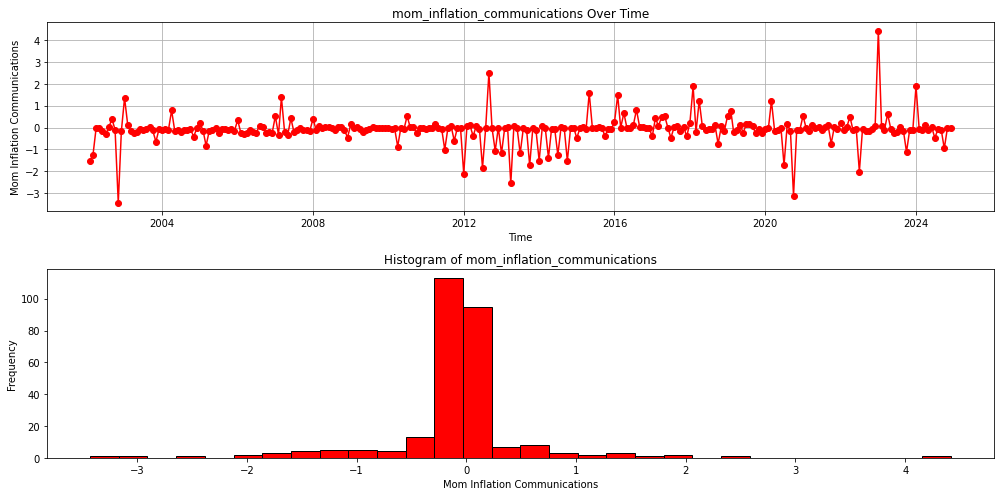

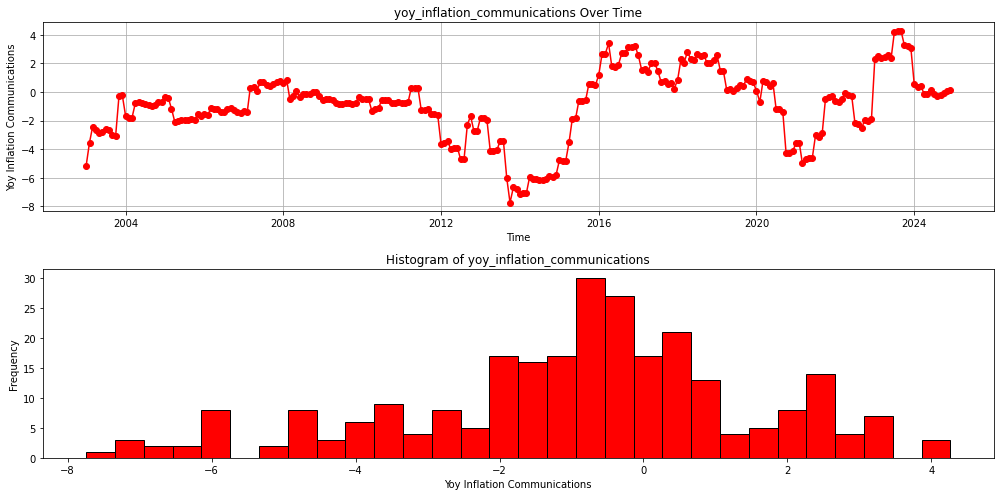

############################################ leisure_culture ############################################


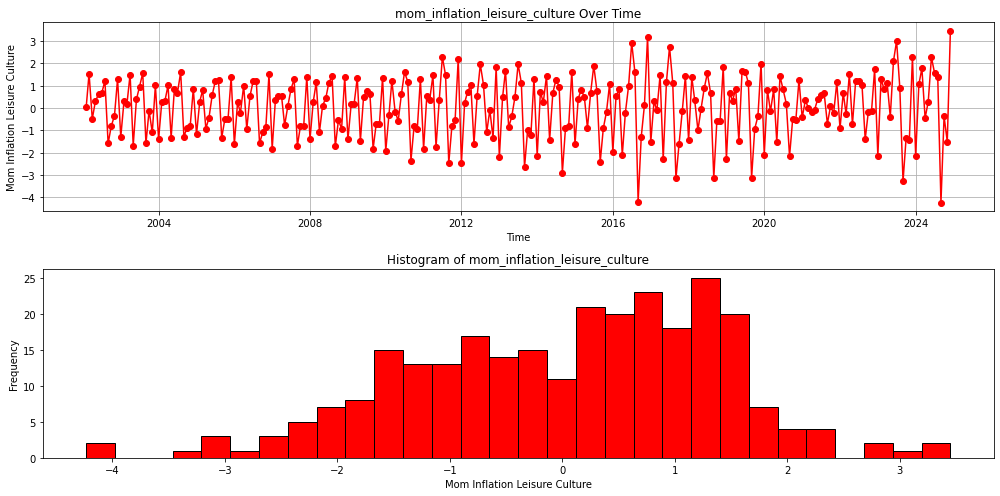

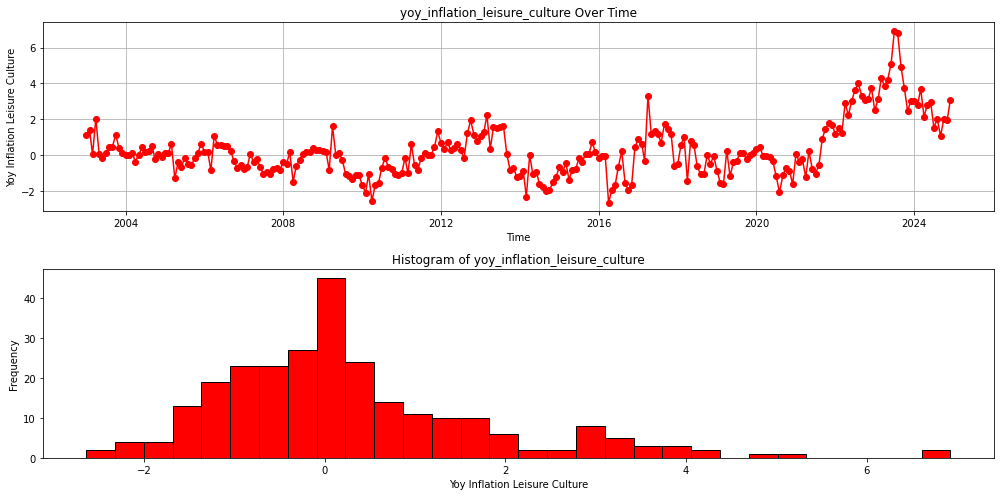

############################################ education ############################################


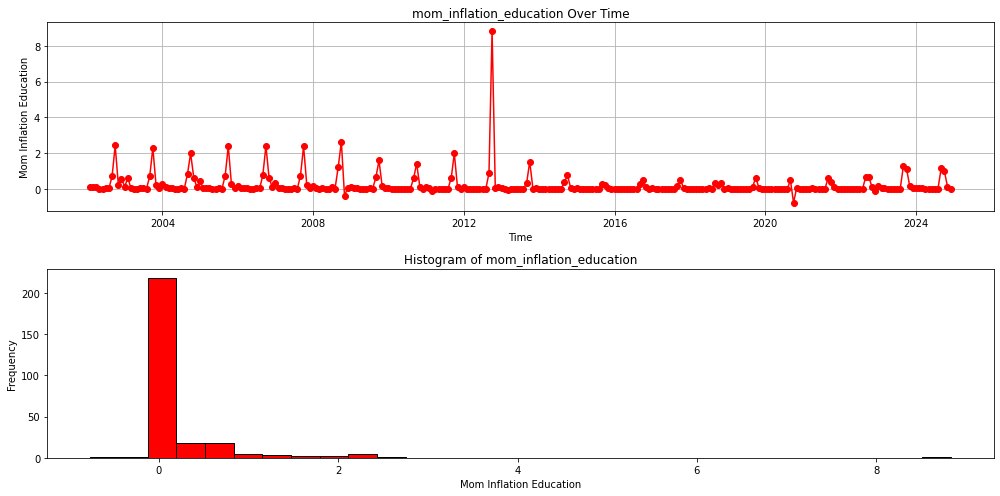

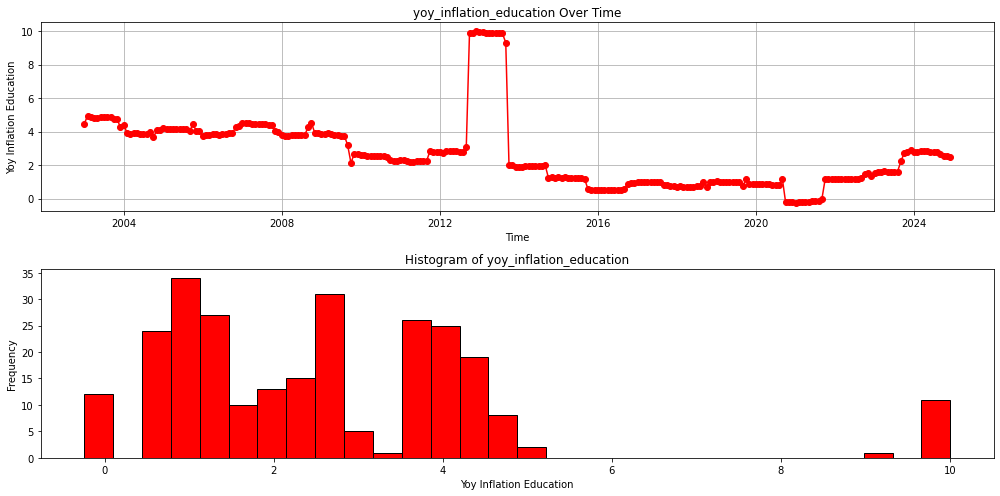

############################################ restaurants_hotels ############################################


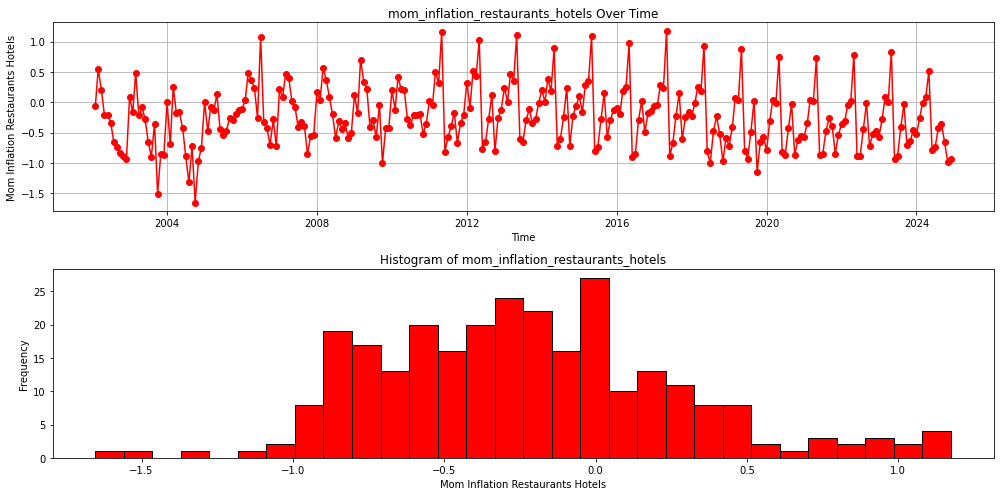

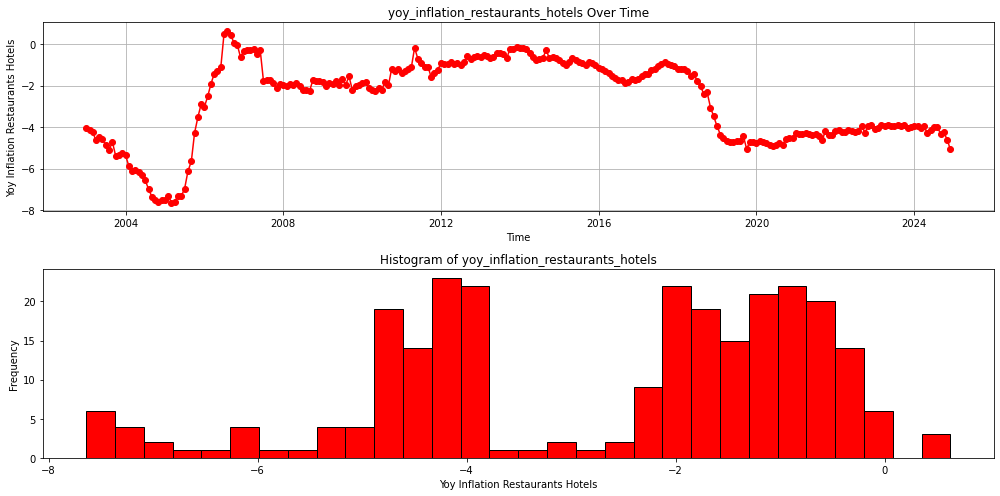

############################################ other_goods_services ############################################


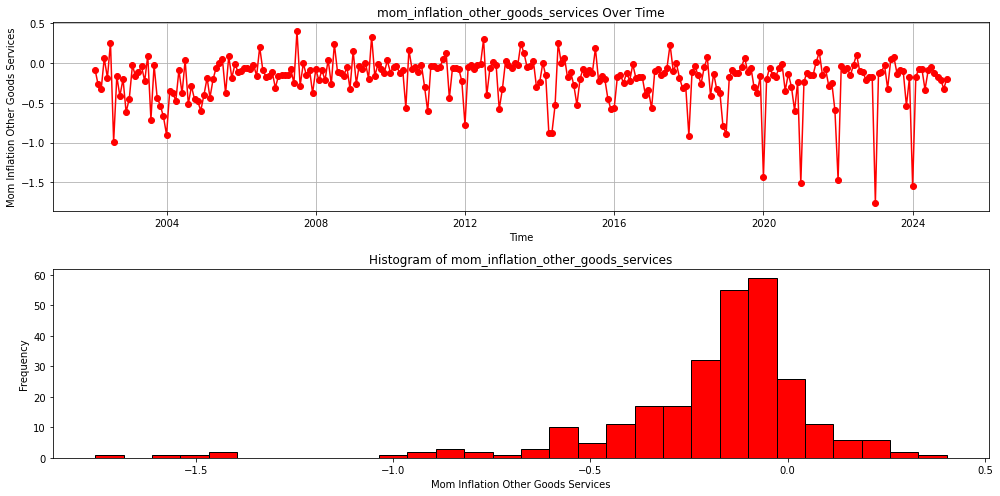

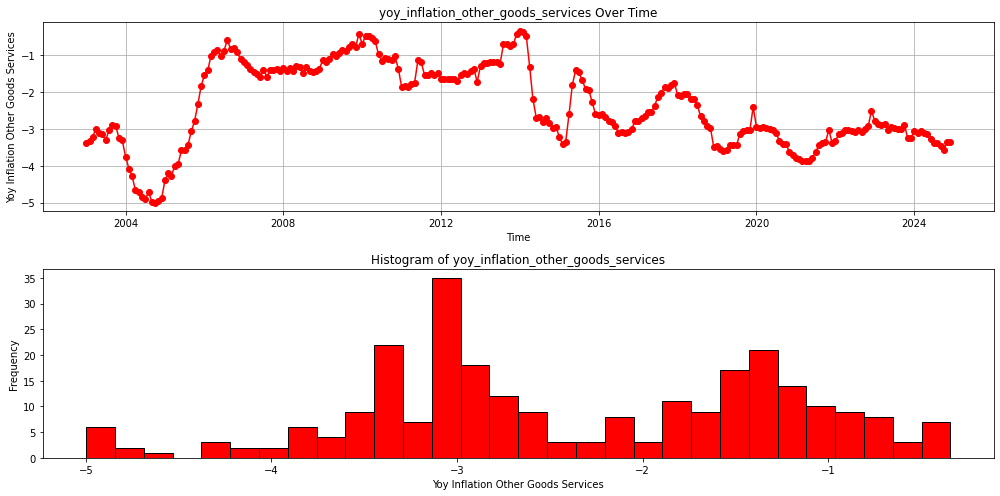

In [74]:
original_columns = [
    'index_general', 'food_beverages', 'alc_tobacco', 'clothing_footwear', 
    'housing_utilities', 'furniture_household', 'health', 'transport', 
    'communications', 'leisure_culture', 'education', 'restaurants_hotels', 
    'other_goods_services'
]

for column in original_columns:

    print(f"############################################ {column} ############################################")
    mom_inflation_column = f'mom_inflation_{column}'
    data[mom_inflation_column] = 100 * (np.log(data[column]) - np.log(data[column].shift(1)))
    plot_inflation(data, mom_inflation_column)

    yoy_inflation_column = f'yoy_inflation_{column}'
    data[yoy_inflation_column] = 100 * (np.log(data[column]) - np.log(data[column].shift(12)))
    plot_inflation(data, yoy_inflation_column)